# Data Preparation

In [34]:
# import library yang dibutuhkan
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics 
import scipy.stats as stats
import statsmodels.api as sm
import random
import warnings
%matplotlib inline

In [35]:
# memuat dataset dan menampilkan 5 baris paling atas dan 5 baris paling bawah
data= pd.read_csv('nyc-rolling-sales.csv')
data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [36]:
# mengetahui dimensi dataframe
data.shape

(84548, 22)

In [37]:
# drop kolom 'Unamed: 0' dan 'EASE-MENT'
data.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [38]:
# mengetahui tipe data pada data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [39]:
# memeriksa kolom yang bertipe kategorik
print('Column name')
for col in data.columns:
    if data[col].dtype=='object':
        print(col, data[col].nunique()) # mengembalikan jumlah nilai unik tanpa NaN

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [40]:
# mengkonversi tipedata feature 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH' menjadi numerik
numer= ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer:
    data[col]= pd.to_numeric(data[col], errors='coerce')
    
# mengkonversi tipedata feature 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'BOROUGH' menjadi kategorik
categ= ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'BOROUGH']
for col in categ:
    data[col]= data[col]. astype('category')
    
# mengkonversi tipedata 'SALE DATE'
data['SALE DATE']= pd.to_datetime(data['SALE DATE'], errors='coerce')

In [41]:
# memeriksa missing value
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [42]:
# mengetahui prosentase missing value
missing= data.isnull().sum()/len(data)*100
print(pd.DataFrame([missing[missing>0],pd.Series(data.isnull().sum()[data.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


In [43]:
# mengetahui dimensi data yang memiliki missing value
print(data[(data['LAND SQUARE FEET'].isnull()) & (data['GROSS SQUARE FEET'].notnull())].shape)
print(data[(data['LAND SQUARE FEET'].notnull()) & (data['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


In [44]:
# mengisi missing value dengan memakai nilai dari kolom GROSS SQUARE FEET ke LAND SQUARE FEET (juga sebaliknya)
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].mask((data['LAND SQUARE FEET'].isnull()) & (data['GROSS SQUARE FEET'].notnull()), data['GROSS SQUARE FEET'])
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].mask((data['LAND SQUARE FEET'].notnull()) & (data['GROSS SQUARE FEET'].isnull()), data['LAND SQUARE FEET'])

In [45]:
# mengetahui jumlah nilai nul yang tersisa pada feture 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'
data[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].isnull().sum()

LAND SQUARE FEET     26246
GROSS SQUARE FEET    26246
SALE PRICE           14561
dtype: int64

In [46]:
# memeriksa duplicate value (missing value di kolom LAND SQUARE FEET maupun GROSS SQUARE FEET)
print(sum(data.duplicated()))
data[data.duplicated(keep=False)].sort_values(['LAND SQUARE FEET', 'GROSS SQUARE FEET']).head()

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
19402,2,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1005,R4,610 WARING AVENUE,1C,10467,1,0,1,0.0,0.0,1957,2,R4,10.0,2017-04-13
19403,2,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1005,R4,610 WARING AVENUE,1C,10467,1,0,1,0.0,0.0,1957,2,R4,10.0,2017-04-13
19415,2,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1253,R4,2385 BARKER AVENUE,2U,10467,1,0,1,0.0,0.0,1958,2,R4,10.0,2017-04-13
19416,2,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1253,R4,2385 BARKER AVENUE,2U,10467,1,0,1,0.0,0.0,1958,2,R4,10.0,2017-04-13
19419,2,BRONXDALE,13 CONDOS - ELEVATOR APARTMENTS,2,4340,1263,R4,2385 BARKER AVENUE,6V,10467,1,0,1,0.0,0.0,1958,2,R4,0.0,2017-07-20


In [47]:
# menghapus duplicate value
data.drop_duplicates(inplace=True)
print(sum(data.duplicated()))

0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  category      
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

In [49]:
data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean(), inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean(), inplace=True)
data['SALE PRICE'].fillna(data['SALE PRICE'].mean(), inplace=True)

In [50]:
data[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].isnull().sum()

LAND SQUARE FEET     0
GROSS SQUARE FEET    0
SALE PRICE           0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  category      
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

In [52]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.280703e+06,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.280703e+06,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17


# Exploratory Data Analysis

## Measures of Central Tendency

In [53]:
# mengetahui luas dan harga rata-rata properti di masing-masing wilayah
data. groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
1,4033.697980,7007.159433,2.919586e+06
2,3909.012725,4489.147412,5.946771e+05
3,2016.057333,2481.756365,8.410834e+05
4,4129.676832,3631.925115,9.049718e+05
5,7849.230260,4654.350216,7.488526e+05


In [54]:
# mengetahui nilai tengah dari luas dan harga masing-masing wilayah
data. groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
1,3857.326255,4206.653514,1.280703e+06
2,2375.000000,1764.000000,2.748970e+05
3,1800.000000,1520.000000,4.256050e+05
4,3857.326255,2376.000000,7.400000e+05
5,3857.326255,1781.500000,5.600000e+05


In [55]:
# mengetahui mode tiap feature berdasarkan BOROUGH
data. groupby('BOROUGH').apply(pd.DataFrame.mode).reset_index(drop=True)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,16,1,R4,169 WEST 95TH STREET,,10011,0,0,1,3857.326255,4206.653514,0,2,R4,1.280703e+06,2017-08-07
1,2,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,,10462,1,0,1,0.000000,0.000000,0,1,D4,0.000000e+00,2017-06-29
2,3,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,,11201,1,0,1,0.000000,0.000000,0,1,R4,0.000000e+00,2016-10-06
3,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,A1,131-05 40TH ROAD,,11354,1,0,1,3857.326255,4206.653514,1920,1,A1,1.280703e+06,2016-11-10
4,5,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2450,1,A5,1235 FOREST HILL ROAD,,10314,1,0,1,3857.326255,4206.653514,1970,1,A5,1.280703e+06,2017-03-01


## Measures of Dispersion

In [56]:
# menentukan range data
numer_data = ['SALE PRICE']
borough_data = [1, 2, 3, 4, 5]

for i in borough_data:
    print(i)
    for j in numer_data:
        print(j, np.ptp(data[data['BOROUGH']==i][j]))

1
SALE PRICE 2209999999.0
2
SALE PRICE 110000000.0
3
SALE PRICE 345000000.0
4
SALE PRICE 257499999.0
5
SALE PRICE 121999999.0


In [57]:
# menentukan variance tiap wilayah
data. groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
1,2.714779e+07,1.371910e+09,4.634363e+14
2,3.375209e+08,8.683572e+08,7.803693e+12
3,7.882877e+07,2.210455e+08,1.561761e+13
4,1.397220e+09,1.160883e+09,7.285544e+12
5,6.945886e+09,4.230782e+09,2.729078e+12


In [58]:
# menentukan standard deviasi tiap wilayah
data. groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
1,5210.353980,37039.305339,2.152757e+07
2,18371.742462,29467.900592,2.793509e+06
3,8878.556905,14867.597573,3.951912e+06
4,37379.410300,34071.736579,2.699175e+06
5,83341.984776,65044.462053,1.651992e+06


## Analyze Confidence Intervals

In [98]:
data.groupby('BOROUGH').agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                     
                 mean           std   size
BOROUGH                                   
1        2.919586e+06  2.152757e+07  18102
2        5.946771e+05  2.793509e+06   6994
3        8.410834e+05  3.951912e+06  23843
4        9.049718e+05  2.699175e+06  26548
5        7.488526e+05  1.651992e+06   8296

In [101]:
mean_mht = 2919586 # rata-rata harga properti di Manhatan
sd_mht = 21527570 # standar deviasi harga properti di Manhattan
n = 18102 # jumlah properti di Manhattan
z = 1.96 # z-score berdasarkan tabel z
se = sd_mht / np.sqrt(n) # menghitung standart eror

# menghitung interval kepercayaan
lower = mean_mht - z*se
upper = mean_mht + z*se
print("(",lower,",",upper,")")

( 2605977.5173839475 , 3233194.4826160525 )


## Hypothesis Testing

In [105]:
queens = data[data["BOROUGH"] == 4]
brooklyn = data[data["BOROUGH"] == 3]
n_queens = len(queens)
mu_queens = queens["SALE PRICE"].mean()
sd_queens = queens["SALE PRICE"].std()
(n_queens, mu_queens, sd_queens)

(26548, 904971.7778157705, 2699174.634140084)

In [106]:
n_br = len(brooklyn)
mu_br = brooklyn["SALE PRICE"].mean()
sd_br = brooklyn["SALE PRICE"].std()
(n_br, mu_br, sd_br)

(23843, 841083.3950845111, 3951911.835186454)

In [107]:
sm.stats.ztest(queens["SALE PRICE"].dropna(),
               brooklyn["SALE PRICE"].dropna(),
              alternative='two-sided')

(2.136937659574009, 0.032603062431574834)

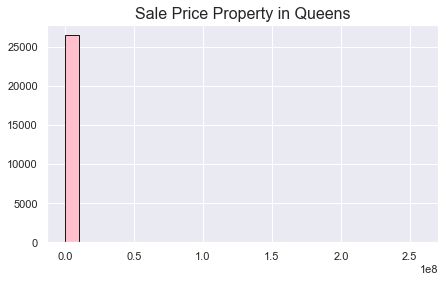

In [117]:
plt.figure(figsize=(7,4))
plt.title("Sale Price Property in Queens", fontsize=16)
plt.hist(queens["SALE PRICE"].dropna(), edgecolor='k', color='pink', bins=25)
plt.show()